In [2]:
#https://archive.ics.uci.edu/ml/datasets/banknote+authentication
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
import urllib.request
import matplotlib.pyplot as plt

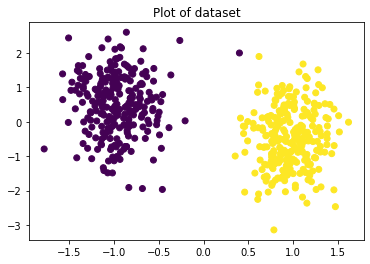

In [32]:
X, y = make_blobs(n_samples =500, centers = 2, n_features = 2, random_state=7)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
a = np.array([[0.4,2]])
b = np.array([0])
X =np.concatenate((X, a))
y = np.concatenate((y, b))

#Plotting the data
plt.title("Plot of dataset")
plt.scatter(X[:, 0], X[:, 1], c=y)

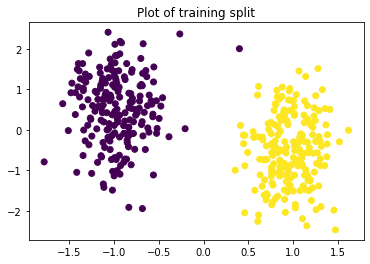

In [33]:
#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=290)
plt.title("Plot of training split")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

Text(0.5, 1.0, 'Plot of testing split')

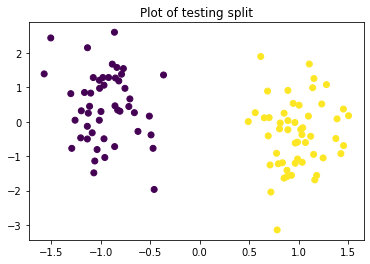

In [34]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title("Plot of testing split")

In [38]:
#Creating a classifier
classifier = Perceptron(max_iter=100, eta0=0.1, random_state=0)
#Training the model using classifier
classifier.fit(X_train, y_train)
#Getting cross validation score to predict the model accuracy
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9975 (+/- 0.0100)


In [39]:
#Lets see how it performs with the unseen data
y_pred = classifier.predict(X_test)
print("Accuracy: %0.4f"% metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9901


In [24]:
#Now lets see the Support vector information
#print(classifier.coef_[0], classifier.intercept_[0])
#print(classifier.support_vectors_[:, 3])

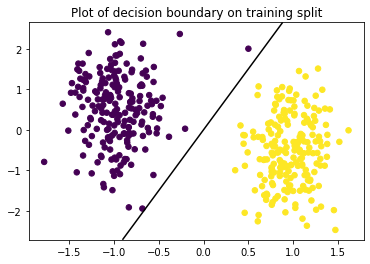

In [25]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)
ax = plt.gca()
plt.title("Plot of decision boundary on training split")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
           linestyles=['-'])
# plot support vectors

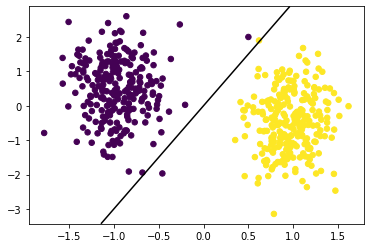

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
           linestyles=['-'])
# plot support vectors